Train_x Shape ::  (482012, 12)
Train_y Shape ::  (482012,)
Test_x Shape ::  (482012, 12)
Test_y Shape ::  (482012,)
Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Test Accuracy  ::  0.5148813722479938
Train Accuracy ::  0.9873488626839165
 Confusion matrix  [[ 40893   5258   3953   6296   8306]
 [ 11298   6587   6061   9156   7768]
 [  6754   4916  12314  20392  13703]
 [  7331   5719  15154  45359  42449]
 [  8403   4405   8931  37580 143026]]


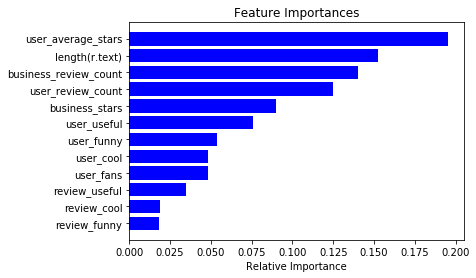

<Figure size 720x576 with 0 Axes>

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#create dataframe from yelp csv 
input_file = "complete_dataset_updated.csv"
dataset = pd.read_csv(input_file)
headers = list(dataset.columns)
feature_headers = headers[0:-1]
target_header = headers[-1]

# Split dataset into train and test dataset
train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=0.5)

 # Train and Test dataset size details
print "Train_x Shape :: ", train_x.shape
print "Train_y Shape :: ", train_y.shape
print "Test_x Shape :: ", test_x.shape
print "Test_y Shape :: ", test_y.shape

clf = RandomForestClassifier()
clf.fit(train_x, train_y)

print "Trained model :: ", clf

predictions = clf.predict(test_x)
 
#for i in xrange(0, 5):
#    print "Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i])
    
# Train and Test Accuracy
print "Test Accuracy  :: ", accuracy_score(test_y, predictions)
print "Train Accuracy :: ", accuracy_score(train_y, clf.predict(train_x))
print " Confusion matrix ", confusion_matrix(test_y, predictions)

#rating_range = list(range(1, 6))
#print(rating_range)
#cm = pd.DataFrame(confusion_matrix(test_y, predictions))
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True)
#plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
features = dataset.columns[0:-1]
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.figure(figsize=(10, 8))
plt.show()

